In [1]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Dense, LSTM

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
# import all from /processed data/
X = np.load(os.getcwd() + '/processed_data/proc_X.npy', allow_pickle=True)
y = np.load(os.getcwd() + '/processed_data/proc_y.npy', allow_pickle=True)
y = LabelEncoder().fit_transform(y)

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [3]:
def create_rnn_model():
    rnn_model = tf.keras.Sequential()
    rnn_model.add(InputLayer(input_shape=(X.shape[1], X.shape[2])))
    rnn_model.add(LSTM(units=64, activation='relu'))
    rnn_model.add(Dense(units=32, activation='relu'))
    #rnn_model.add(LSTM(units=32, activation='relu', dropout=0.25))
    rnn_model.add(Dense(len(np.unique(y)), activation='softmax'))
    rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return rnn_model

In [4]:
model = create_rnn_model()
best_model = None

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2021-11-21 14:57:54.437505: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-21 14:57:54.437671: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
# Do K-fold cross validation
kf = KFold(n_splits=5, shuffle=False)
fold_accuracies = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
    accuracy = model.evaluate(X_test, y_test)
    if all(accuracy[0] > acc for acc in fold_accuracies):
        best_model = model
    fold_accuracies.append(accuracy[1])

2021-11-21 14:57:55.032758: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-21 14:57:55.034952: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2021-11-21 14:57:55.280130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


42/42 [==============================] - ETA: 0s - loss: 3.2578 - accuracy: 0.0919

2021-11-21 14:58:09.090559: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


42/42 [==============================] - 14s 327ms/step - loss: 3.2578 - accuracy: 0.0919 - val_loss: 3.3251 - val_accuracy: 0.1182
Epoch 2/10
42/42 [==============================] - 13s 314ms/step - loss: 3.0730 - accuracy: 0.1581 - val_loss: 3.3805 - val_accuracy: 0.1182
Epoch 3/10
42/42 [==============================] - 13s 315ms/step - loss: 3.0063 - accuracy: 0.1603 - val_loss: 3.3745 - val_accuracy: 0.1182
Epoch 4/10
42/42 [==============================] - 13s 315ms/step - loss: 2.9646 - accuracy: 0.1641 - val_loss: 3.3241 - val_accuracy: 0.1242
Epoch 5/10
42/42 [==============================] - 13s 314ms/step - loss: 2.9324 - accuracy: 0.1755 - val_loss: 3.4806 - val_accuracy: 0.1152
Epoch 6/10
42/42 [==============================] - 13s 318ms/step - loss: 2.9133 - accuracy: 0.1816 - val_loss: 3.3021 - val_accuracy: 0.1242
Epoch 7/10
42/42 [==============================] - 13s 316ms/step - loss: 2.9048 - accuracy: 0.1771 - val_loss: 3.3295 - val_accuracy: 0.1091
Epoch 8/10

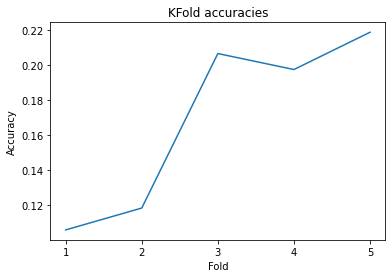

In [9]:
plt.plot(range(1,6), fold_accuracies)
plt.xticks(range(1,6))
plt.title('KFold accuracies')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

In [7]:
# save model to /models/
best_model.save(os.getcwd() + '/models/best_model.h5')